In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import time
import os

from datetime import date
from datetime import timedelta
from datetime import datetime

import pickle

import json

import pandas as pd
import numpy as np
import random 


import pandas_ta as ta

import mplfinance as mpf 

In [3]:
from handle_data.read_data import load_candles

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
symbol = "BTC/USDT"
symbol = "SOL/USDT"
timeframe='1h'
exchange='Binance'
#exchange='Bybit'

In [6]:
history_days = 50 * 30
#history_days = 150

start_date = (date.today() - timedelta(days=history_days)).strftime('%Y-%m-%d')
end_date=None

#start_date ="2024-01-15"
#end_date = "2024-01-17"

#start_date = "2019-11-01"

print("start_date:",start_date)
print("end_date:",end_date)

start_date: 2019-12-27
end_date: None


In [7]:
data = load_candles(exchange, symbol, timeframe=timeframe, start_date=start_date, end_date=end_date, )

reading /home/jovyan/work/data/SOL-USDT/1h/SOL-USDT_1h_Binance.pickle


In [8]:
#mpf.plot(data, type='candle', volume=True,) 

In [9]:
#data

In [10]:
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour
data['day'] = data.index.day
data['var'] = ((data['High'] - data['Low']) /  data['Open']) * 100
data

,Open,High,Low,Close,Volume,hour,dayofweek,day,var
Open time,,,,,,,,,
2020-08-11 06:00:00,2.850000,3.470000,2.850000,2.951500,20032.26,6,1,11,21.754391
2020-08-11 07:00:00,2.951500,3.135500,2.880000,2.922400,42069.37,7,1,11,8.656610
2020-08-11 08:00:00,2.962600,3.000000,2.914400,2.960000,24280.76,8,1,11,2.889351
2020-08-11 09:00:00,2.960000,2.973600,2.850000,2.854300,26371.23,9,1,11,4.175676
2020-08-11 10:00:00,2.856600,2.932900,2.843300,2.897600,26685.94,10,1,11,3.136590
...,...,...,...,...,...,...,...,...,...
2024-02-03 04:00:00,99.230003,99.820000,99.180000,99.620003,67524.38,4,5,3,0.644966
2024-02-03 05:00:00,99.629997,100.089996,99.370003,100.070000,65326.75,5,5,3,0.722667
2024-02-03 06:00:00,100.059998,100.070000,99.599998,99.599998,57957.36,6,5,3,0.469719


<Axes: xlabel='hour'>

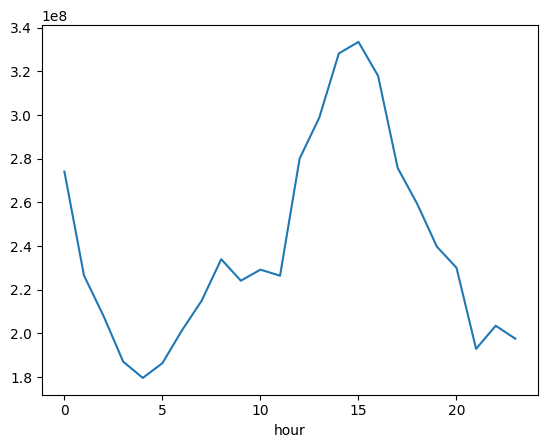

In [11]:
data.groupby(['hour'])['Volume'].sum().plot()

<Axes: xlabel='hour'>

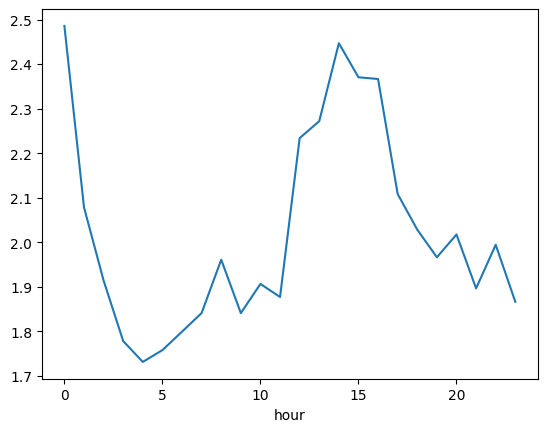

In [12]:
data.groupby(['hour'])['var'].mean().plot()

In [13]:
data.groupby(['hour'])['var'].mean()

hour
0     2.485685
1     2.078349
2     1.913883
3     1.777930
4     1.731108
5     1.757656
6     1.799080
7     1.840899
8     1.960738
9     1.840709
10    1.906253
11    1.876917
12    2.233669
13    2.271899
14    2.446835
15    2.370378
16    2.366475
17    2.108107
18    2.028107
19    1.966117
20    2.017307
21    1.896271
22    1.994157
23    1.866241
Name: var, dtype: float32

In [14]:
timeframe='1d'

In [15]:
data = load_candles(exchange, symbol, timeframe=timeframe, start_date=start_date, end_date=end_date, )

reading /home/jovyan/work/data/SOL-USDT/1d/SOL-USDT_1d_Binance.pickle


In [16]:
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour
data['day'] = data.index.day
data['var'] = ((data['High'] - data['Low']) /  data['Open']) * 100

<Axes: xlabel='dayofweek'>

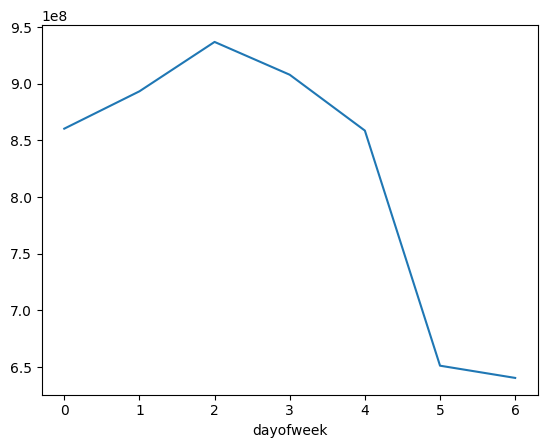

In [17]:
data.groupby(['dayofweek'])['Volume'].sum().plot()

<Axes: xlabel='dayofweek'>

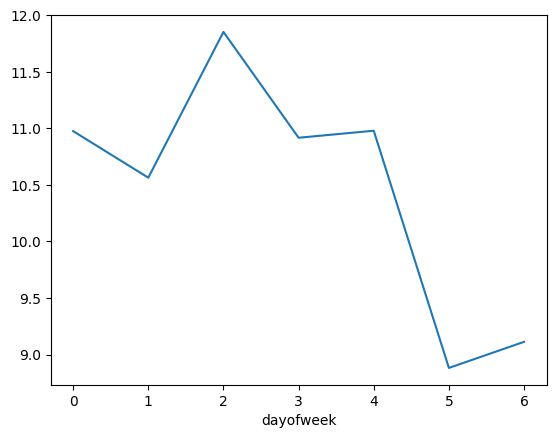

In [18]:
data.groupby(['dayofweek'])['var'].mean().plot()

It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. [Source](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html)

In [19]:
data.groupby(['dayofweek'])['var'].mean()

dayofweek
0    10.975553
1    10.563649
2    11.852797
3    10.916926
4    10.979001
5     8.881324
6     9.112042
Name: var, dtype: float32

<Axes: xlabel='day'>

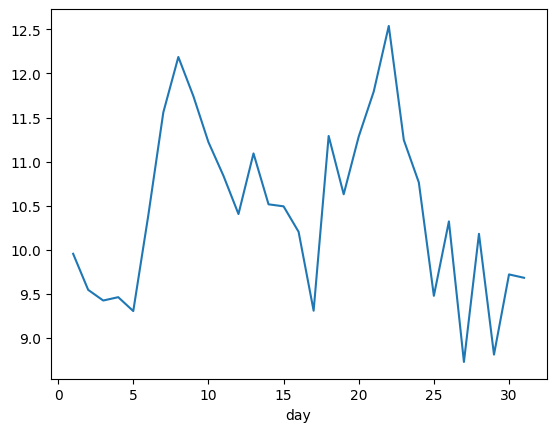

In [20]:
data.groupby(['day'])['var'].mean().plot()

In [21]:
data.groupby(['day'])['var'].mean()

day
1      9.954592
2      9.545477
3      9.424380
4      9.462267
5      9.304754
6     10.390080
7     11.558714
8     12.187101
9     11.742528
10    11.221821
11    10.839834
12    10.405466
13    11.093081
14    10.515790
15    10.492846
16    10.203798
17     9.308890
18    11.290908
19    10.629730
20    11.284527
21    11.795705
22    12.539417
23    11.245319
24    10.763493
25     9.477985
26    10.321683
27     8.727882
28    10.181023
29     8.811178
30     9.720513
31     9.682272
Name: var, dtype: float32

In [22]:
data['var'].mean()

10.469425